In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dataset import LunaDataset, get_nodule_candidate_info_list
from util.visualization import get_positive_samples, show_nodule_candidate

In [2]:
# a sample of the data contains {CT voxel region (around the possible nodule center), label (nodule or not), uid, center_irc}
LunaDataset()[0]

2023-03-28 20:12:56,938 INFO     pid:20404 dataset:251:__init__ Dataset 495958 train samples


(tensor([[[[ 156.,  103.,  115.,  ...,   71.,   92.,   28.],
           [ 114.,   84.,  116.,  ...,   33.,   57.,   27.],
           [  71.,   31.,   46.,  ...,   35.,   50.,   11.],
           ...,
           [  32.,   30.,   30.,  ...,  102.,   97.,   40.],
           [  48.,   67.,   47.,  ...,  177.,  189.,  123.],
           [ 140.,  157.,  100.,  ...,  152.,  172.,  162.]],
 
          [[ 138.,   78.,   83.,  ...,   44.,   65.,   30.],
           [ 108.,   74.,  132.,  ...,   86.,   77.,   28.],
           [  53.,   50.,   60.,  ...,  -68.,  -64.,  -25.],
           ...,
           [  20.,  105.,   56.,  ...,  169.,   93.,   48.],
           [  54.,  102.,   51.,  ...,  155.,   32.,  -72.],
           [  13.,   40.,   28.,  ...,  129.,  -24.,  -52.]],
 
          [[ -38.,  -23.,  -24.,  ...,   79.,   24.,   27.],
           [  72.,   58.,   53.,  ...,   29.,  -52.,    8.],
           [  -4.,   34.,   44.,  ...,   13.,   32.,   35.],
           ...,
           [  57.,  144.,  102.

In [3]:
# get the all possible nodule's info, as in {is_nodule, diameter, uid, center(xyz)}
nodule_candidate_info = get_nodule_candidate_info_list()
# get only the nodule subsets
nodules = [x for x in nodule_candidate_info if x[0]]    # 0th element is boolean is_nodule
# get the nodules' diameter
diameters = [x[1] for x in nodules]

# check some nodule diameter
for i in range(0, len(diameters), 100):
    print(f'{i} {diameters[i]:.1f} mm')

0 32.3 mm
100 17.7 mm
200 13.0 mm
300 10.0 mm
400 8.2 mm
500 7.0 mm
600 6.3 mm
700 5.7 mm
800 5.1 mm
900 4.7 mm
1000 4.0 mm
1100 0.0 mm
1200 0.0 mm
1300 0.0 mm


2023-03-28 20:12:57,471 INFO     pid:20404 dataset:251:__init__ Dataset 495958 train samples
2023-03-28 20:12:57,577 INFO     pid:20404 dataset:251:__init__ Dataset 541 train samples


1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405 160 True [160, 261, 264, 396, 412, 413, 415, 421, 439]


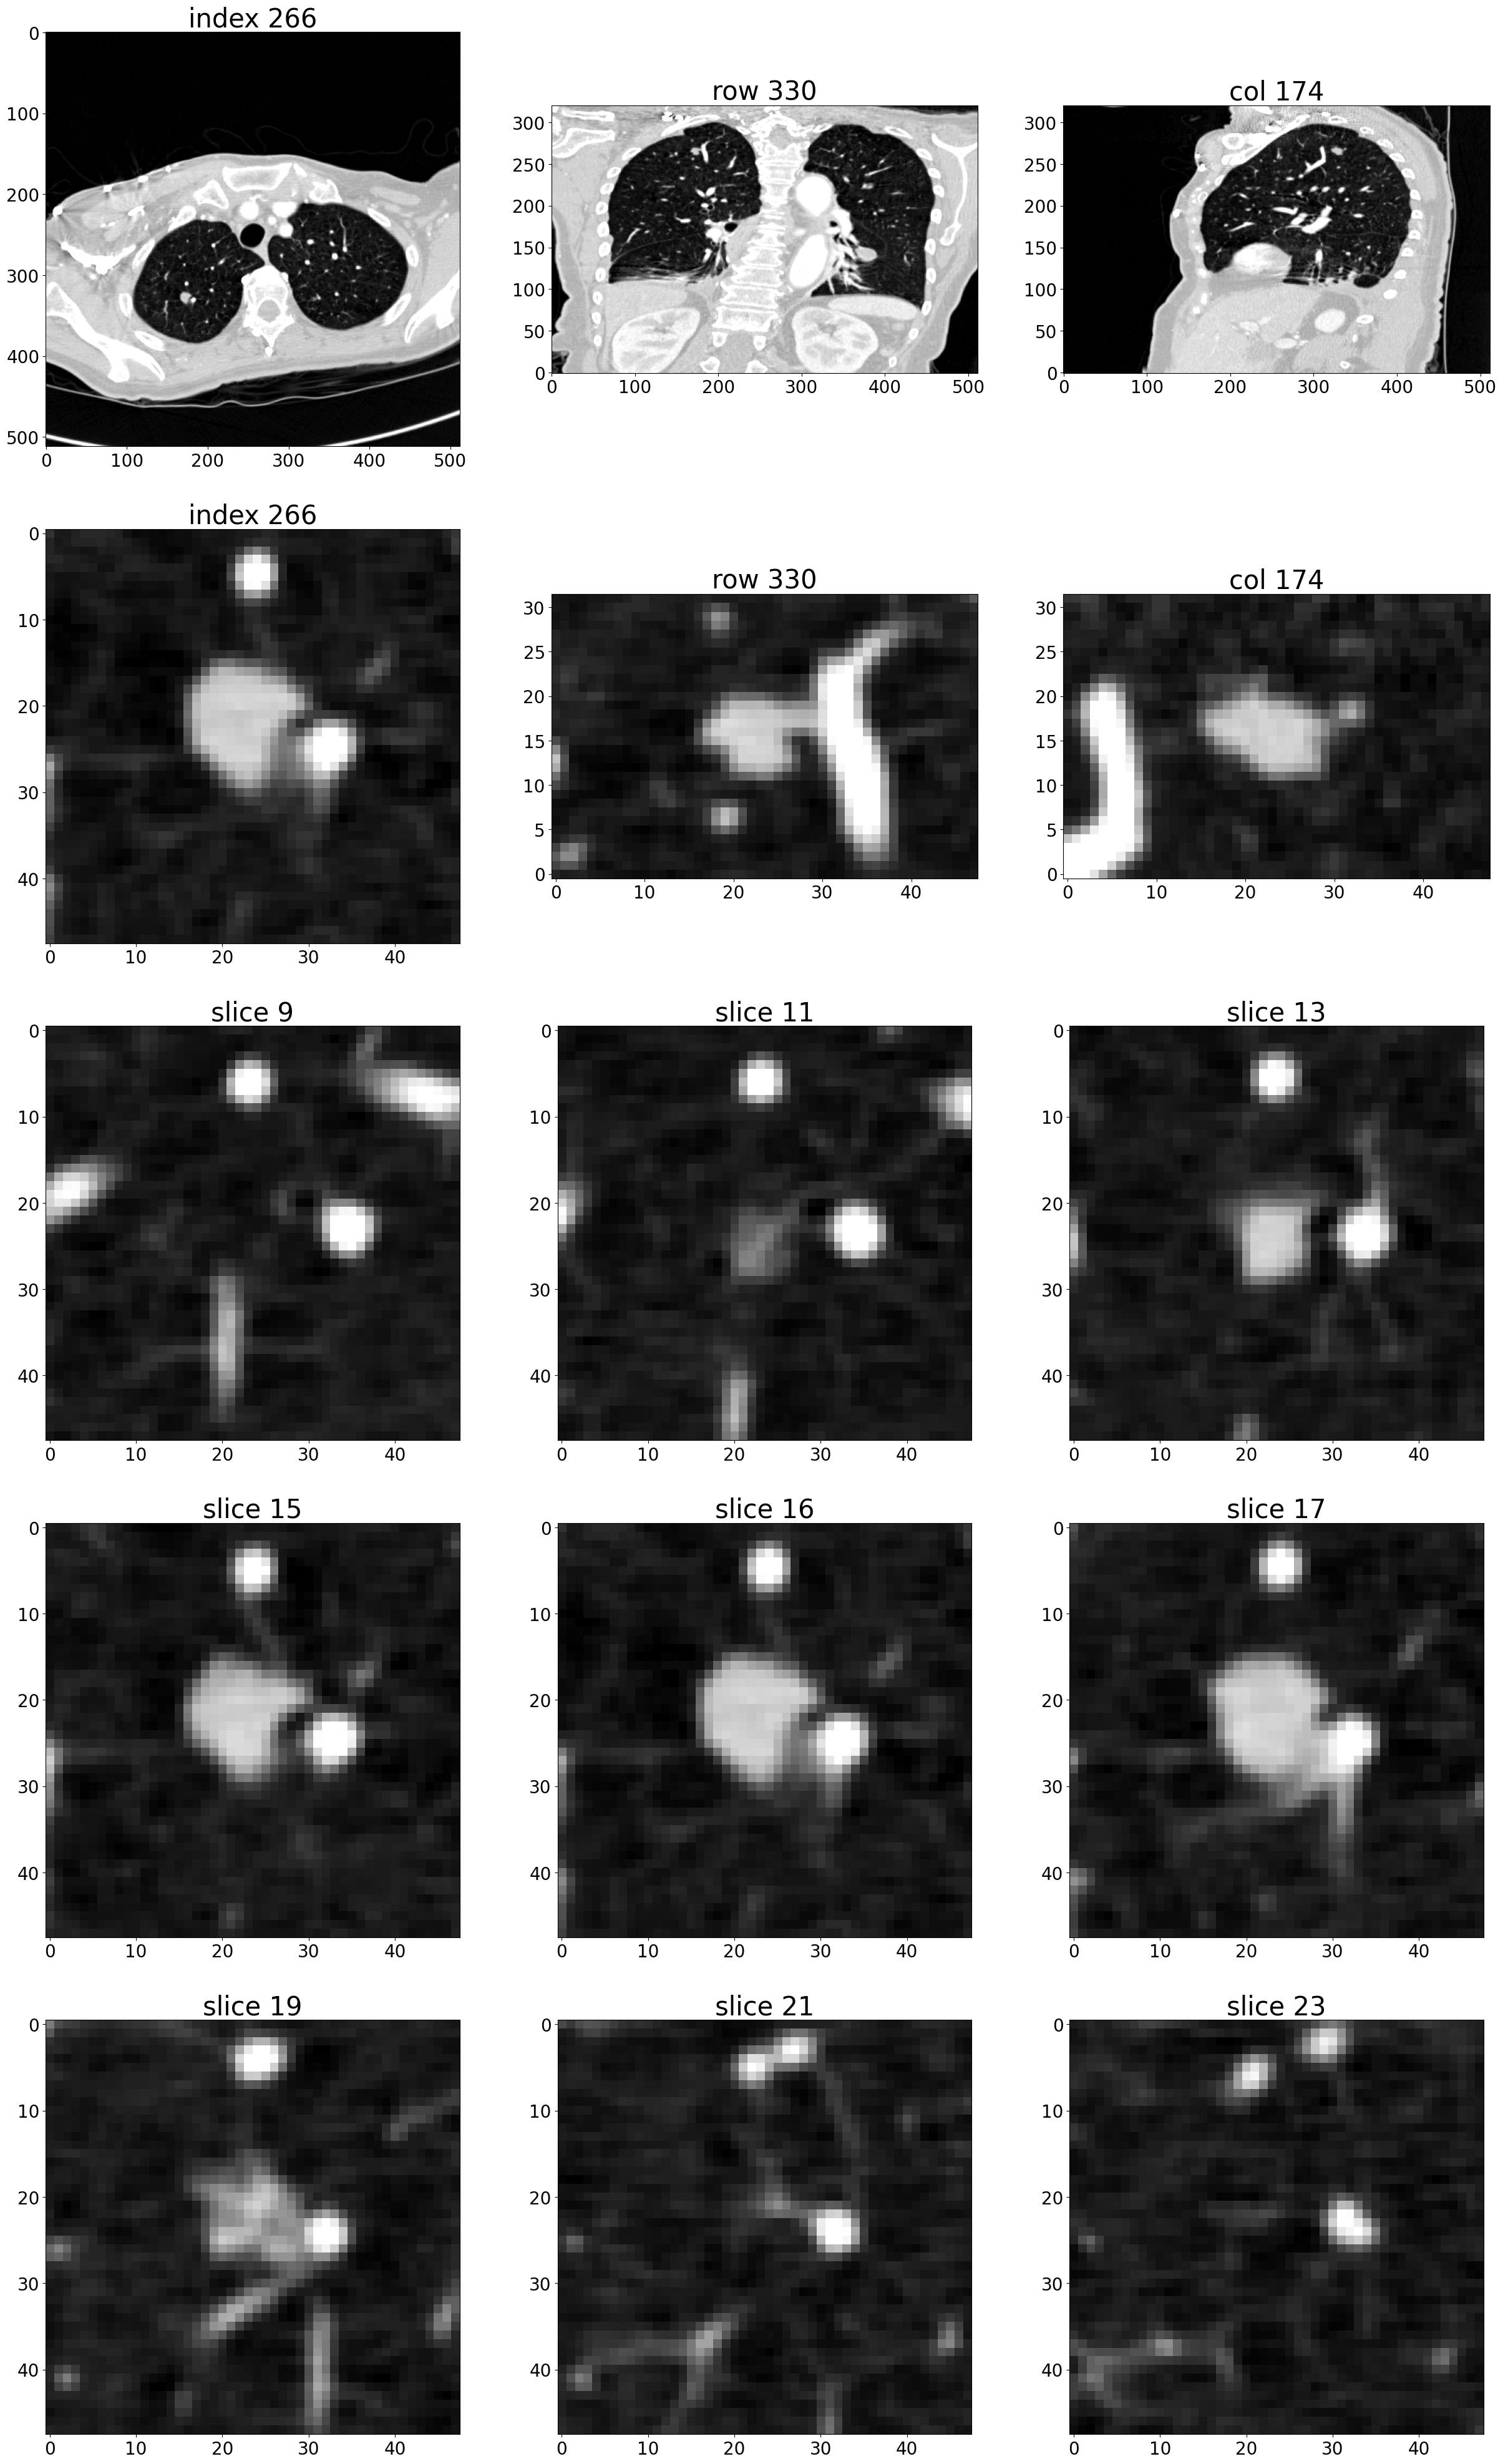

In [4]:
# get the positive nodules
nodule_samples = get_positive_samples()

# get the uid of an arbitrary sample
uid = nodule_samples[11][2]

# display it
show_nodule_candidate(uid)

In [5]:
# check data augmentations
augmentation_dict = {}
augmentation_list = [
    ('None', {}),
    ('flip', {'flip': True}),
    ('offset', {'offset': 0.1}),
    ('scale', {'scale': 0.2}),
    ('rotate', {'rotate': True}),
    ('noise', {'noise': 25.0}),    
]

# create one dataset for each augmentation type
augmented_datasets = [LunaDataset(augmentations=augmentation_dict) for _, augmentation_dict in augmentation_list]

# all augmentations in one dataset
all_dict = {}
for _, augmentation_dict in augmentation_list:
    all_dict.update(augmentation_dict)
all_augmented_dataset = LunaDataset(augmentations=all_dict)

# create 3 of the all augmentation datasets, then append to the single augmentation datasets
augmentation_list.extend([('All', augmentation_dict)] * 3)
augmented_datasets.extend([all_augmented_dataset] * 3)

2023-03-28 20:13:02,973 INFO     pid:20404 dataset:251:__init__ Dataset 495958 train samples
2023-03-28 20:13:03,373 INFO     pid:20404 dataset:251:__init__ Dataset 495958 train samples
2023-03-28 20:13:03,772 INFO     pid:20404 dataset:251:__init__ Dataset 495958 train samples
2023-03-28 20:13:04,173 INFO     pid:20404 dataset:251:__init__ Dataset 495958 train samples
2023-03-28 20:13:04,570 INFO     pid:20404 dataset:251:__init__ Dataset 495958 train samples
2023-03-28 20:13:04,968 INFO     pid:20404 dataset:251:__init__ Dataset 495958 train samples
2023-03-28 20:13:05,363 INFO     pid:20404 dataset:251:__init__ Dataset 495958 train samples


torch.Size([1, 32, 48, 48]) (tensor([1, 0]), '1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860', tensor([ 62, 323,  50]))


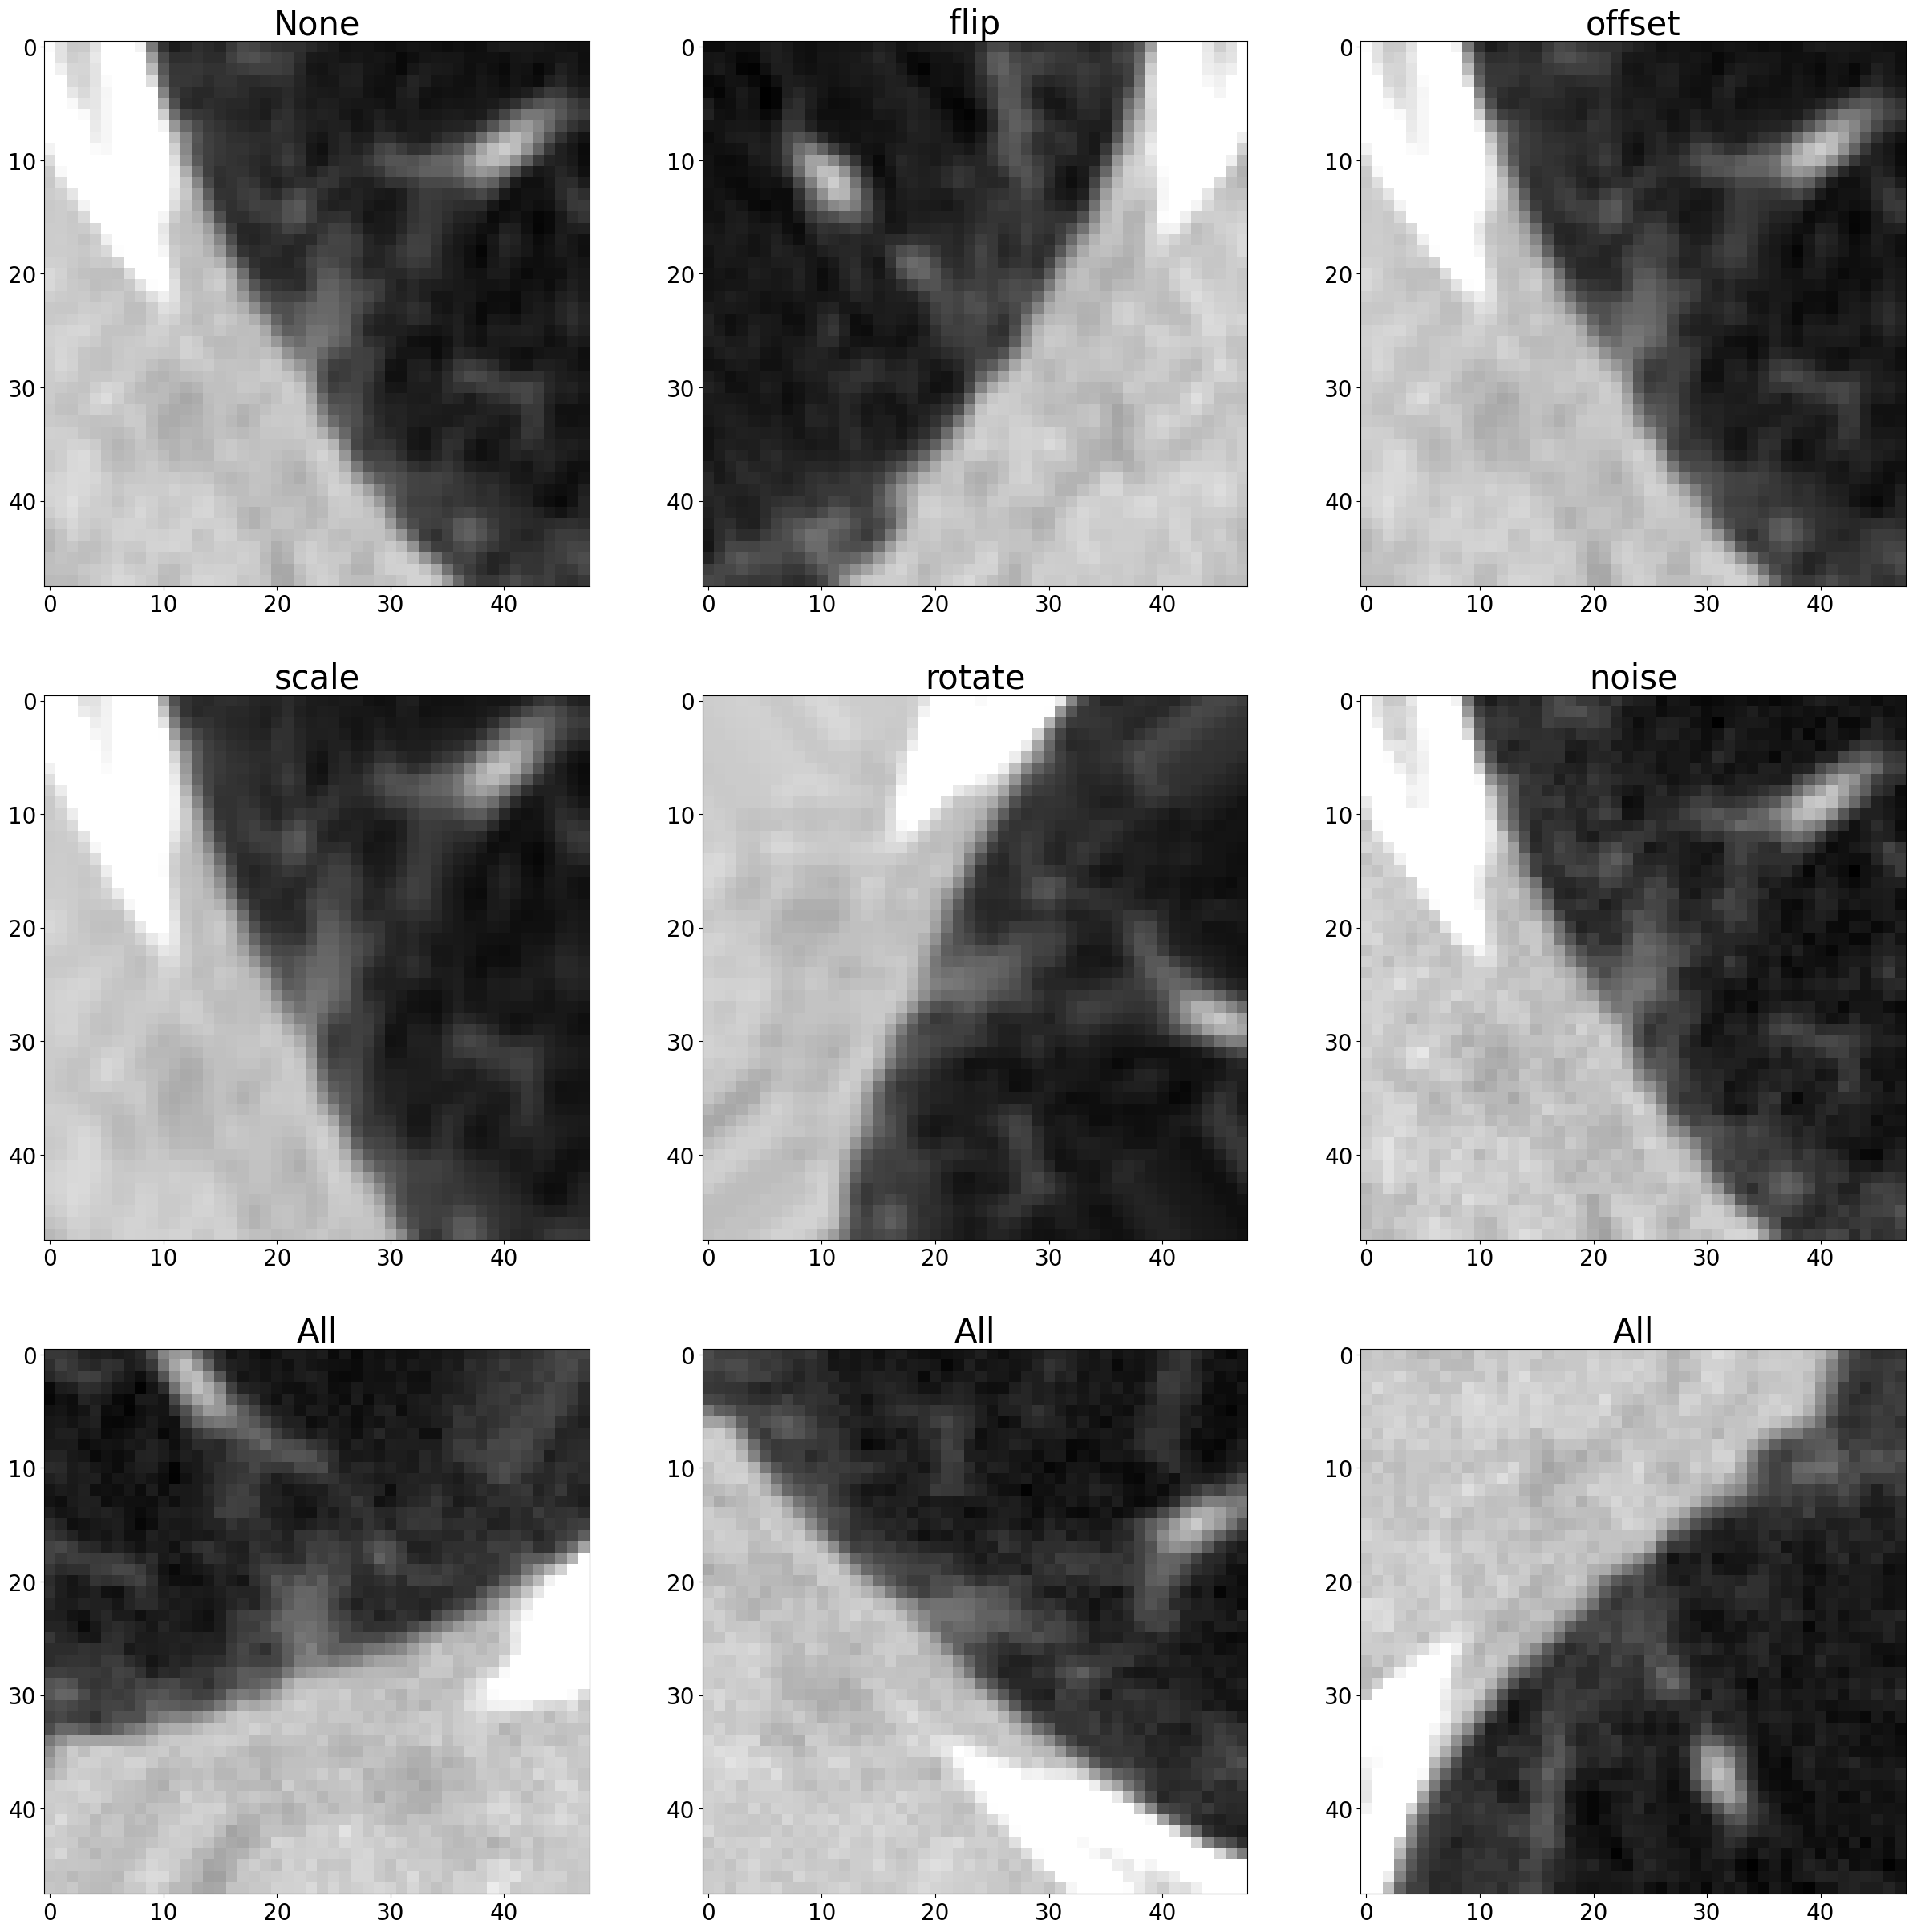

In [6]:
# check a random sample
sample_idx = 10
sample = all_augmented_dataset[sample_idx]
print(sample[0].shape, sample[1:])

# plot the data augmentations
fig = plt.figure(figsize=(30, 30))
clim=(-1000.0, 300)

for i, ((title_str, _), ds) in enumerate(zip(augmentation_list, augmented_datasets)):
    sample_tup = ds[sample_idx]
    subplot = fig.add_subplot(3, 3, i+1)
    subplot.set_title(title_str, fontsize=30)
    for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
        label.set_fontsize(20)
    plt.imshow(sample_tup[0][0][16], clim=clim, cmap='gray')